# Abberation mapping workflow 1: Process patches #

*25 Jan 2023*

*11 September 2023*

Originally by Debayan Saha.  Jamie White modified Debayan's notebooks. 

Updating for Jamie's environment on the cluster.

Documenting installation / file locations.

Updating to run locally on a Mac / PC.

## Environment paths ##

Not necessary in local non-cuda environment

In [1]:
# # not necessary for running locally on a mac  
# %env PATH=/sw/ap|ps/python3/3.7.4/bin:/sw/apps/jupyter-tensorboard/0.1.6/bin:/sw/apps/hdf5/1.8.16/bin:/sw/apps/cuda/10.0.130/bin:/sw/bin:/usr/lib64/qt-3.3/bin:/sbin:/bin:/usr/sbin:/usr/bin
# %env LD_LIBRARY_PATH=/sw/apps/python3/3.7.4/lib:/sw/apps/hdf5/1.8.16/lib:/sw/apps/cuda/10.0.130/lib64:/sw/apps/cuda/10.0.130/lib:/sw/lib

In [2]:
# ! env

## Load packages ##

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append(".")
# sys.path.append('/home/dsaha/.local/lib/python3.7/site-packages/')
from main import *
import os
import tifffile
import shutil
import warnings
import tqdm
warnings.filterwarnings(action='once')
%load_ext autoreload
%autoreload 2
def min_max_norm(arr):
    return (arr - np.min(arr))/(np.max(arr) - np.min(arr))

from IPython.display import display, clear_output
from time            import sleep


## Utility functions ##

In [37]:
def pretty_print_dict(d):
    print(json.dumps(d, indent=4))

___

## Files and parameters ##

In [38]:
# relative path to bead image stack
image_file = "data/andrea/2022_09_06_Beads_0p2_2ndfloorscope_test/beads.tif"

In [39]:
fiji_path       = "/Applications/ImageJ/ImageJ.app/Contents/MacOS/ImageJ"      # absolute path to ImageJ/Fiji executable
fiji_macro_dir  =  "imageJ_macros/"                                            # path to custom macros

In [40]:
# select proper macro
fiji_macro      = 'zola_macro_cluster_1p2_z_50_2ndfloor.ijm'

In [41]:
zola_script_dir = 'scripts/'
zola_script     = 'bashscript_fiji.sh'

In [48]:
# set new parameters
crop_shape      = [40, 40, 40]
unit            = [0.05, 0.2, 0.2]
abb_list        = [3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
thresh_bck      = 10
num_folders     = 50
thresh_dist     = 11.29999999999999999999999999999999999
lam             = 0.515

## Construct filepaths ##

From current working directory. 

In [29]:
base_path = os.getcwd()+'/' # everything relative to the current directory
base_path

'/Users/jwhite/Library/Mobile Documents/com~apple~CloudDocs/Science/Grill_Lab/Projects/aberration_mapping/'

In [30]:
fiji_macro_path = f'{base_path}{fiji_macro_dir}{fiji_macro}'
fiji_macro_path

'/Users/jwhite/Library/Mobile Documents/com~apple~CloudDocs/Science/Grill_Lab/Projects/aberration_mapping/imageJ_macros/zola_macro_cluster_1p2_z_50_2ndfloor.ijm'

In [31]:
# construct full path to image file and set save directory
img_path  = f"{base_path}{image_file}"
img_path

'/Users/jwhite/Library/Mobile Documents/com~apple~CloudDocs/Science/Grill_Lab/Projects/aberration_mapping/data/andrea/2022_09_06_Beads_0p2_2ndfloorscope_test/beads.tif'

In [32]:
# file_path and save_dir variables for compatibility
file_path = os.path.dirname(img_path) +'/'
save_dir  = file_path
file_path

'/Users/jwhite/Library/Mobile Documents/com~apple~CloudDocs/Science/Grill_Lab/Projects/aberration_mapping/data/andrea/2022_09_06_Beads_0p2_2ndfloorscope_test/'

In [46]:
zola_script_path = f"{base_path}{zola_script_dir}"

## Set new parameters ##

In [47]:
# parameters
new_parameters = {}

new_parameters['crop_shape']      = crop_shape
new_parameters['unit']            = unit
new_parameters['abb_list']        = abb_list
new_parameters['FIJI_MACRO_PATH'] = fiji_macro_path
new_parameters['thresh_bck']      = thresh_bck
new_parameters['num_folders']     = num_folders
new_parameters['thresh_dist']     = thresh_dist
new_parameters['lam']             = lam
new_parameters

{'crop_shape': [40, 40, 40],
 'unit': [0.1, 0.1, 0.1],
 'abb_list': [3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 'FIJI_MACRO_PATH': '/Users/jwhite/Library/Mobile Documents/com~apple~CloudDocs/Science/Grill_Lab/Projects/aberration_mapping/imageJ_macros/zola_macro_cluster_1p2_z_50_2ndfloor.ijm',
 'thresh_bck': 10,
 'num_folders': 50,
 'thresh_dist': None,
 'lam': None}

## Check data folder

In [10]:
file_path

'/home/jwhite/projects/aberration_mapping/data/andrea/2022_09_06_Beads_0p2_2ndfloorscope'

In [11]:
! ls -lga "{file_path}"

total 324176
drwxrwsr-x 10 project-jwhite      4096 Sep  8 13:53 .
drwxrwsr-x 10 project-jwhite      4096 Jan 26  2023 ..
drwxr-sr-x  2 project-jwhite      4096 Sep  8 13:53 abb_maps
-rw-rw-r--  1 project-jwhite      2396 Sep  8 13:53 accepted_points_in_image.png
drwxrwsr-x  2 project-jwhite     45056 Jan 25  2023 accepted_zola
-rw-rw-r--  1 project-jwhite     58172 Sep  8 15:09 amplitude_distribution.png
-rwxrw-r--  1 project-jwhite 321626563 Jan 25  2023 beads.tif
-rwxrw-r--  1 project-jwhite      4096 Jan 25  2023 ._.DS_Store
-rwxrw-r--  1 project-jwhite      8196 Sep  8 13:24 .DS_Store
-rw-rw-r--  1 project-jwhite  10072554 Sep  8 13:53 label_map.tif
drwxr-sr-x  2 project-jwhite      4096 Sep  8 13:53 measurements
drwxr-sr-x  2 project-jwhite      4096 Sep  8 13:53 med_measurement
-rw-rw-r--  1 project-jwhite       317 Sep  8 15:26 params.json
drwxrwsr-x 53 project-jwhite      4096 Sep 11 15:02 patches_for_zola
drwxr-sr-x  2 project-jwhite      4096 Sep  8 13:53 point_boxes
-rw-rw-

## Fiji application and ImageJ macros

### Check Fiji macros ###

In [12]:
# check current macro directory
fiji_macro_dir

'/home/jwhite/projects/aberration_mapping/imageJ_macros/'

In [13]:
fiji_macro_path

'/home/jwhite/projects/aberration_mapping/imageJ_macros/zola_macro_cluster_1p2_z_50_2ndfloor.ijm'

In [14]:
# check available macros
! ls -lga "{fiji_macro_dir}"

total 88
drwxrwsr-x 3 project-jwhite 4096 Sep  7 13:55 .
drwxrwsr-x 8 project-jwhite 4096 Sep 11 15:39 ..
drwxr-sr-x 2 project-jwhite 4096 Sep  7 13:58 .ipynb_checkpoints
-rwxrw-r-- 1 project-jwhite  406 Jan 25  2023 Macro_preprcoess.ijm
-rwxrwxr-x 1 project-jwhite 1589 Jan 25  2023 zola_macro_cluster_0p8_z_200.ijm
-rw-rw-r-- 1 project-jwhite 1590 Jan 25  2023 zola_macro_cluster_1p0_z_100.ijm
-rwxrwxr-x 1 project-jwhite 1590 Jan 25  2023 zola_macro_cluster_1p0_z_200.ijm
-rw-rw-r-- 1 project-jwhite 1590 Jan 25  2023 zola_macro_cluster_1p0_z_300.ijm
-rw-rw-r-- 1 project-jwhite 1590 Jan 25  2023 zola_macro_cluster_1p1_z_200.ijm
-rwxrw-r-- 1 project-jwhite 1989 Jan 25  2023 zola_macro_cluster_1p1_z_300.ijm
-rw-rw-r-- 1 project-jwhite 1590 Jan 25  2023 zola_macro_cluster_1p2_z_100.ijm
-rw-rw-r-- 1 project-jwhite 1590 Jan 25  2023 zola_macro_cluster_1p2_z_50_2ndfloor.ijm
-rwxrw-r-- 1 project-jwhite 1773 Jan 25  2023 zola_macro_cluster_1p2_z_50_debug.ijm
-rw-rw-r-- 1 project-jwhite 1589 Jan 2

In [15]:
# update fiji macro if necessary
# fiji_macro      = 'zola_macro_cluster_1p2_z_50_2ndfloor.ijm'
fiji_macro_path = f'{fiji_macro_dir}{fiji_macro}'

## Check old parameters if they exist

In [16]:
# look at parameters from last processing job
old_params      = setup_param_file(img_path)
old_params

{'crop_shape': [40, 40, 40],
 'unit': [0.1, 0.1, 0.1],
 'abb_list': [3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 'FIJI_MACRO_PATH': '/home/jwhite/projects/aberration_mapping/imageJ_macros/zola_macro_cluster_1p2_z_100_2ndfloor.ijm',
 'COMPUTERNAME': 'r02n14',
 'thresh_bck': 10,
 'lam': 0.515,
 'thresh_dist': 11.299999999999999,
 'save_dir': '/home/jwhite/projects/aberration_mapping/data/andrea/2022_09_06_Beads_0p2_2ndfloorscope',
 'num_folders': 50}

## Load and show the image

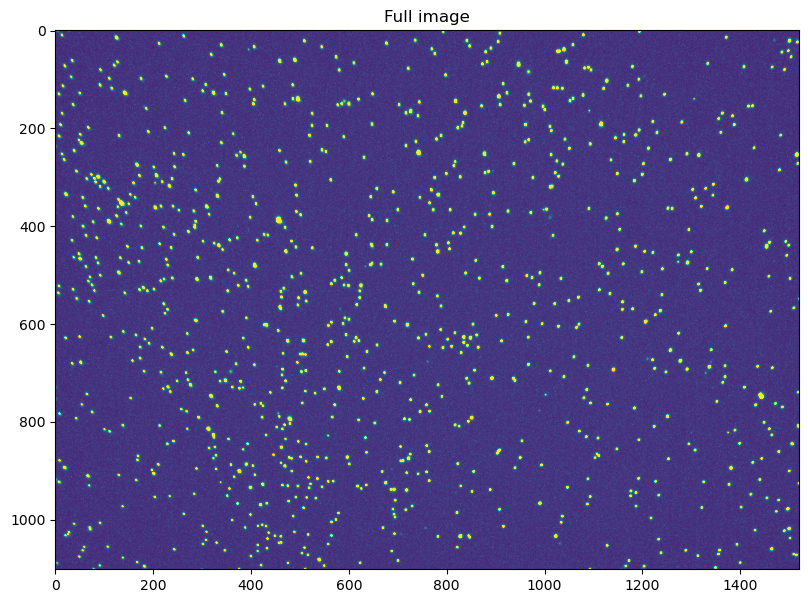

In [17]:
img = tifffile.imread(img_path)
img_max = np.max(img,0)

%matplotlib inline
fig, axs = plt.subplots(1,1,figsize=(10,7))
plt.imshow(img_max, clim=(np.percentile(img_max,0), np.percentile(img_max,99)))
plt.title("Full image");
# None;

## Load points from csv file and save patches

In [18]:
from main import *
find_psf_crops(
    img_path, 
    crop_shape     = crop_shape, 
    num_folders    = num_folders, 
    thresh_bck     = thresh_bck, 
    threshold_dist = thresh_dist,
    unit           = unit,
    show_ignored   = False, 
    show_accepted  = False, 
    headless       = False
)

Found 942 points
Deleting 216 because points are too close
Deleting 54 because patches could not be cropped
Deleting because of multiple labels in the cropbox
Deleting because of multiple labels in the cropbox
Deleting because of multiple labels in the cropbox
Deleting because of multiple labels in the cropbox
Deleting because of multiple labels in the cropbox
Deleting because of multiple labels in the cropbox
Deleting because of multiple labels in the cropbox
Deleting because of multiple labels in the cropbox
Deleting because of multiple labels in the cropbox
Deleting because of multiple labels in the cropbox
Deleting because of multiple labels in the cropbox
Deleting because of multiple labels in the cropbox
Deleting because of multiple labels in the cropbox
Deleting because of multiple labels in the cropbox
Deleting because of multiple labels in the cropbox
Deleting because of multiple labels in the cropbox
Deleting because of multiple labels in the cropbox
Deleting because of multi

## Troubleshooting  `find_psf_crops` ##

In [19]:
def find_psf_crops(img_path, crop_shape=(16,16,16), num_folders=50, thresh_bck=100, threhold_dist=10, show_ignored=False, show_accepted=False, headless=False):
    '''
    find, select and save patches
    img_path = String, path to the image
    crop_shape = 3d tuple of ints as (z,y,x). z axis is only for reference
    num_folders = int, for parallel processing, images will be saved in as many num_folders
    thresh_bck = float, absolute cut off value for SNR, depends on the images
    show_accepted, show_ignored = Boolean, flags for visualization of accepted or ignored patches
    headless = Boolean, displays output if False

    '''
    dirpath = os.path.dirname(img_path)
    img = tifffile.imread(img_path)

    if headless:
        show_ignored = False
        show_accepted = False

    # load points found in Fiji
    results_csv_path = dirpath+"/Results.csv"
    try:
        # fiji_points = genfromtxt(results_csv_path, delimiter=',')#.astype() #load the 2d points from scv file
        #
        # Jamie: not elegant but it gets the job done.
        #
        # Read data
        fiji_points = genfromtxt(results_csv_path, delimiter=',')#.astype(float) #load the 2d points from scv file
        # get ride of nans
        fiji_points = fiji_points[~np.isnan(fiji_points)]
        fiji_points = fiji_points.astype(int)
        fiji_points = fiji_points.reshape(int(len(fiji_points)/3),3)    
    except:
        print("Cannot load Results.csv file")
    if fiji_points.shape[-1]==3:
        points2d = fiji_points[1:,1:] # leave out the first row (contains strings X and Y ) and first column (contains enumeration of points)
    else:
        points2d = fiji_points[1:,:]  # leave out the first row (contains strings X and Y ) 
    points2d[:,[1,0]] = points2d[:,[0,1]] # flip x and y co-ordinates
    if not headless:
        print(f"Found {points2d.shape[0]} points")

    # throw out points that are very close determined by threhold_dist
    # threhold_dist = np.maximum(8,crop_shape[-1]/3)
    # threhold_dist = 10
    dist = (np.sort(cdist(points2d, points2d),1)[:,1:]<threhold_dist)[:,0]
    if not headless:
        print(f"Deleting {sum(dist==True)} because points are too close")
    points2d = np.delete(points2d, np.where(dist==True),0)

    # find the location of maximum pixel along z axis and create 3d points
    zmax = [np.argmax(img[:,_p[0],_p[1]]) for _p in points2d]
    points = np.insert(points2d, 0, zmax, 1)

    # crop patches around the 3d points
    new_points, patches = get_patches(points.copy(), img, patch_shape=tuple([int(t/2) for t in crop_shape]), headless=headless);

    processed_counter = 0
    accepted_counter = 0
    rejected_counter = 0

    # remove all the directories and make new ones
    patches_dirs = glob.glob(f"{dirpath}/patches_for_zola/patches_*/")
    [shutil.rmtree(p, ignore_errors=True) for p in patches_dirs]
    [os.makedirs(f"{dirpath}/patches_for_zola/patches_{i}/") for i in range(num_folders)]  
        
    # loop over the points and patches
    # for pt, patch in tqdm(zip(new_points, patches), disable=headless): 
    for pt, patch in zip(new_points, patches):

        i = int(np.random.uniform(low = 0, high=num_folders))
        patches_dir = f"{dirpath}/patches_for_zola/patches_{i}/"

        # crop th patch around the punkta
        z_patches = crop_around_punkta(patch, pt[0], thresh_bck=thresh_bck, show=show_ignored, headless=headless)
        if z_patches is not None:
            [tifffile.imwrite(f"{patches_dir}/planes_{key}_z_{pt[0]}_y_{pt[1]}_x_{pt[2]}.tif",val.astype(np.float32)) for key,val in z_patches.items()]  
            if show_accepted:
                print(f"Using z_{pt[0]}_y_{pt[1]}_x_{pt[2]}")
                show_patch(z_patches[list(z_patches.keys())[-2]])
            accepted_counter = accepted_counter+1
        else:
            rejected_counter = rejected_counter + 1
        processed_counter = processed_counter + 1

    if not headless:
        print(f"Processed {processed_counter} patches")
        print(f"saved {accepted_counter} patches")
        print(f"Rejected {rejected_counter} patches")

## Troubleshooting  `find_psf_crops` ##

In [20]:
# dirpath = os.path.dirname(img_path)
# results_csv_path = dirpath+"/Results.csv"
# fiji_points = genfromtxt(results_csv_path, delimiter=',')#.astype(float) #load the 2d points from scv file
# fiji_points = fiji_points[~np.isnan(fiji_points)]
# fiji_points = fiji_points.astype(int)
# fiji_points = fiji_points.reshape(int(len(fiji_points)/3),3)
# # fiji_points

In [21]:
# dirpath = os.path.dirname(img_path)
# results_csv_path = dirpath+"/Results.csv"

# headless=False

# try:
#     fiji_points = genfromtxt(results_csv_path, delimiter=',')#.astype(float) #load the 2d points from scv file
#     fiji_points = fiji_points[~np.isnan(fiji_points)]
#     fiji_points = fiji_points.astype(int)
#     fiji_points = fiji_points.reshape(int(len(fiji_points)/3),3)    
# except:
#     print("Cannot load Results.csv file")
# if fiji_points.shape[-1]==3:
#     points2d = fiji_points[1:,1:] # leave out the first row (contains strings X and Y ) and first column (contains enumeration of points)
# else:
#     points2d = fiji_points[1:,:]  # leave out the first row (contains strings X and Y ) 

# points2d[:,[1,0]] = points2d[:,[0,1]] # flip x and y co-ordinates

# if not headless:
#     print(f"Found {points2d.shape[0]} points")

In [22]:
# threhold_dist=10

# # throw out points that are very close determined by threhold_dist
# # threhold_dist = np.maximum(8,crop_shape[-1]/3)
# # threhold_dist = 10
# dist = (np.sort(cdist(points2d, points2d),1)[:,1:]<threhold_dist)[:,0]
# if not headless:
#     print(f"Deleting {sum(dist==True)} because points are too close")
# points2d = np.delete(points2d, np.where(dist==True),0)

# # find the location of maximum pixel along z axis and create 3d points
# zmax = [np.argmax(img[:,_p[0],_p[1]]) for _p in points2d]
# points = np.insert(points2d, 0, zmax, 1)

# # crop patches around the 3d points
# new_points, patches = get_patches(points.copy(), img, patch_shape=tuple([int(t/2) for t in crop_shape]), headless=headless);

# processed_counter = 0
# accepted_counter = 0
# rejected_counter = 0


In [23]:
# show_ignored  = False, 
# show_accepted = False, 
# headless      = False

# # remove all the directories and make new ones
# patches_dirs = glob.glob(f"{dirpath}/patches_for_zola/patches_*/")
# [shutil.rmtree(p, ignore_errors=True) for p in patches_dirs]
# [os.makedirs(f"{dirpath}/patches_for_zola/patches_{i}/") for i in range(num_folders)]  

# # loop over the points and patches
# # for pt, patch in tqdm(zip(new_points, patches), disable=headless): 
# for pt, patch in zip(new_points, patches):

#     i = int(np.random.uniform(low = 0, high=num_folders))
#     patches_dir = f"{dirpath}/patches_for_zola/patches_{i}"

#     # crop th patch around the punkta
#     z_patches = crop_around_punkta(patch, pt[0], thresh_bck=thresh_bck, show=show_ignored, headless=headless)
#     if z_patches is not None:
#         [print(f"{patches_dir}/planes_{key}_z_{pt[0]}_y_{pt[1]}_x_{pt[2]}.tif",val.astype(np.float32)) for key,val in z_patches.items()]
#         [tifffile.imwrite(f"{patches_dir}/planes_{key}_z_{pt[0]}_y_{pt[1]}_x_{pt[2]}.tif", val.astype(np.float32)) for key,val in z_patches.items()]  
#         if show_accepted:
#             print(f"Using z_{pt[0]}_y_{pt[1]}_x_{pt[2]}")
#             show_patch(z_patches[list(z_patches.keys())[-2]])
#         accepted_counter = accepted_counter+1
#     else:
#         rejected_counter = rejected_counter + 1
#     processed_counter = processed_counter + 1

# if not headless:
#     print(f"Processed {processed_counter} patches")
#     print(f"saved {accepted_counter} patches")
#     print(f"Rejected {rejected_counter} patches")

## Test `find_psf_crops` ##

In [24]:
# # Input
# # thresh_bck = 10
# if thresh_dist is None:
#     thresh_dist = 1.13/unit[-1]
# # thresh_dist=20
# find_psf_crops(
#     img_path       = img_path, 
#     crop_shape     = crop_shape, 
#     num_folders    = num_folders, 
#     thresh_bck     = thresh_bck, 
#     threshold_dist = thresh_dist,
#     unit           = unit,
#     show_accepted  = False, 
#     show_ignored   = False, 
#     headless       = False,
# )

## Load patches

In [25]:
# load the patches
patch_files = glob.glob(f"{os.path.dirname(img_path)}/patches_for_zola/patches*/planes_10_*.tif")
print(f"Found {len(patch_files)} patch files")
names = [os.path.splitext(os.path.basename(p))[0] for p in patch_files]
crops = {n: tifffile.imread(p) for n, p in zip(names, patch_files)}
pos = np.array([list(map(int, re.findall(r'\d+', n))) for n in names])
pos = pos[:,1:]

Found 626 patch files


In [26]:
patch_files[:2]

['/home/jwhite/projects/aberration_mapping/data/andrea/2022_09_06_Beads_0p2_2ndfloorscope/patches_for_zola/patches_28/planes_10_z_51_y_464_x_291.tif',
 '/home/jwhite/projects/aberration_mapping/data/andrea/2022_09_06_Beads_0p2_2ndfloorscope/patches_for_zola/patches_28/planes_10_z_54_y_151_x_36.tif']

## Show the beads

planes_10_z_51_y_464_x_291 410.0


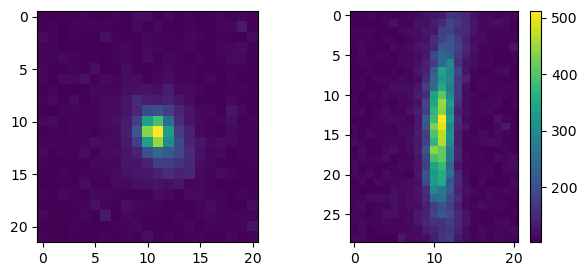

(29, 22, 21)
planes_10_z_54_y_151_x_36 289.0


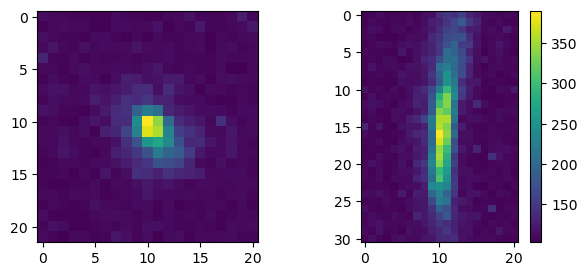

(31, 22, 21)
planes_10_z_54_y_619_x_1274 532.0


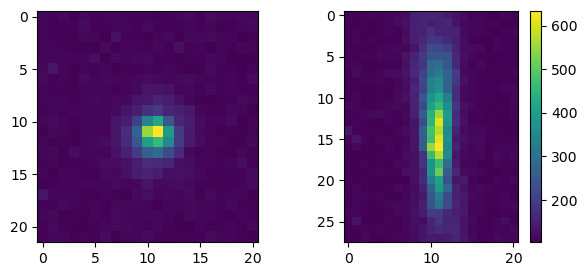

(28, 22, 21)
planes_10_z_50_y_854_x_314 406.0


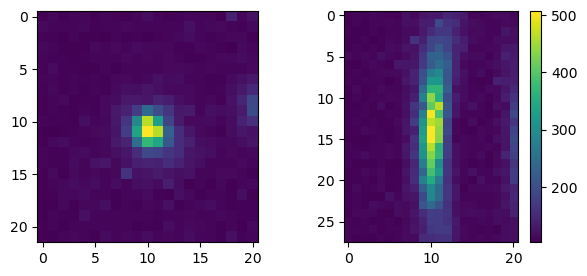

(28, 22, 21)
planes_10_z_50_y_932_x_828 403.0


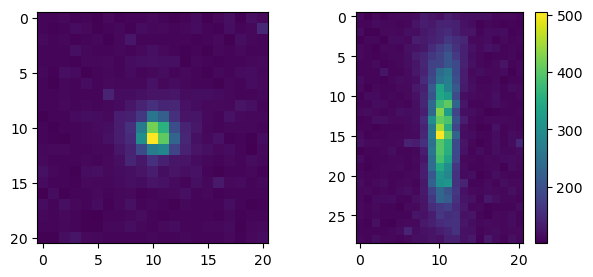

(29, 21, 21)
planes_10_z_51_y_742_x_531 409.0


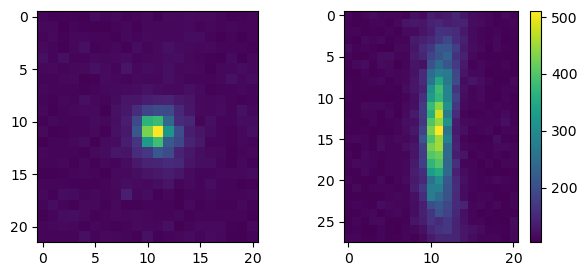

(28, 22, 21)
planes_10_z_48_y_1009_x_38 262.0


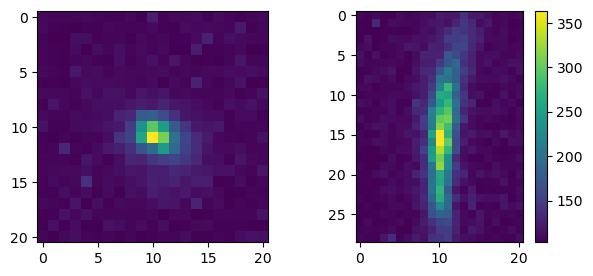

(29, 21, 21)
planes_10_z_52_y_592_x_286 476.0


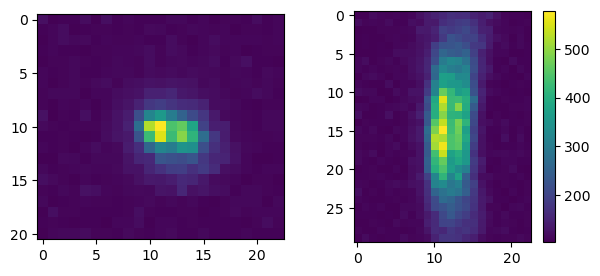

(30, 21, 23)
planes_10_z_54_y_342_x_1308 498.0


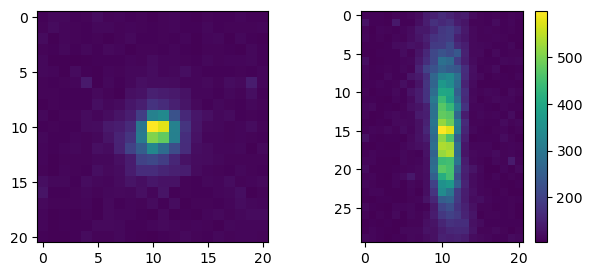

(30, 21, 21)
planes_10_z_54_y_352_x_765 466.0


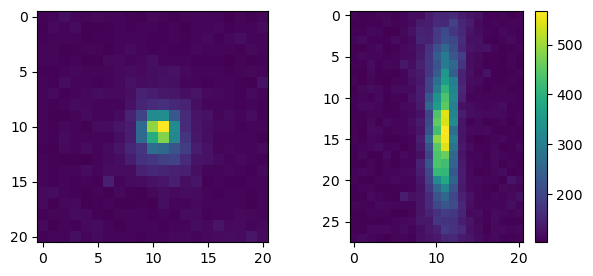

(28, 21, 21)
planes_10_z_48_y_1057_x_821 398.0


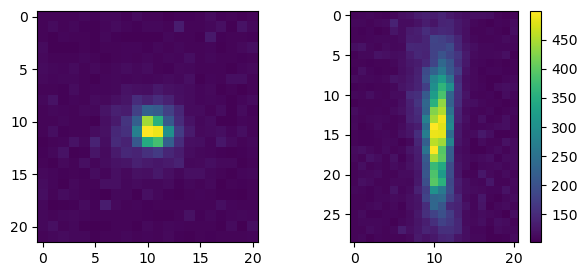

(29, 22, 21)
planes_10_z_53_y_277_x_386 410.0


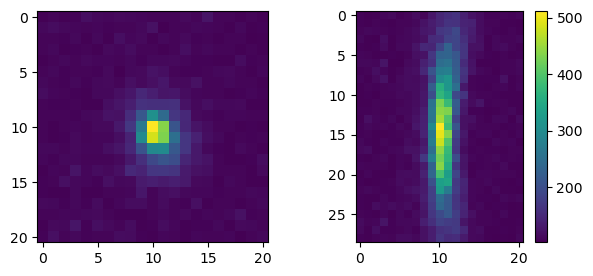

(29, 21, 21)
planes_10_z_54_y_708_x_1039 563.0


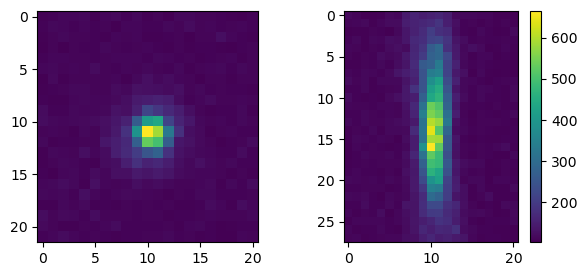

(28, 22, 21)
planes_10_z_52_y_954_x_203 348.0


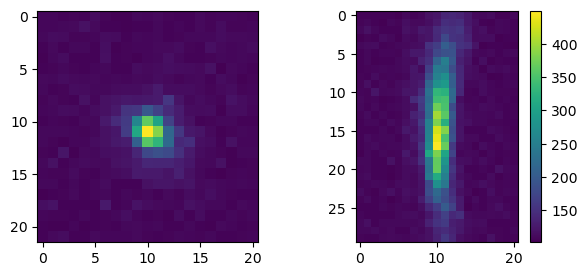

(30, 22, 21)
planes_10_z_54_y_714_x_664 469.0


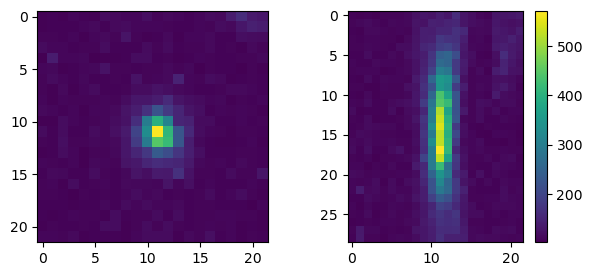

(29, 22, 22)
planes_10_z_52_y_747_x_318 1115.0


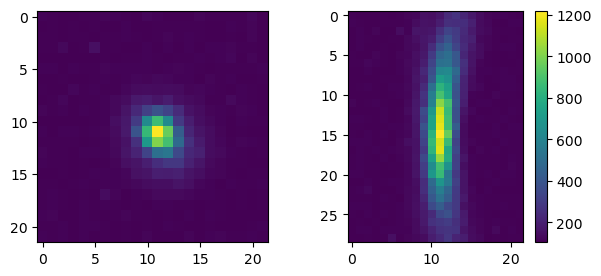

(29, 22, 22)
planes_10_z_50_y_661_x_465 341.0


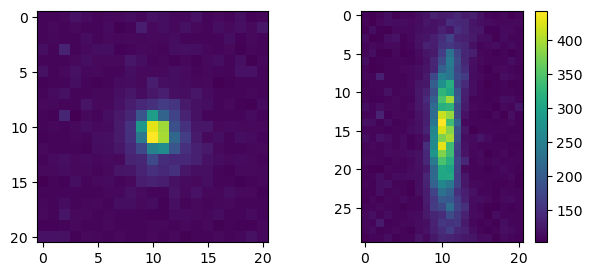

(30, 21, 21)
planes_10_z_55_y_521_x_624 934.0


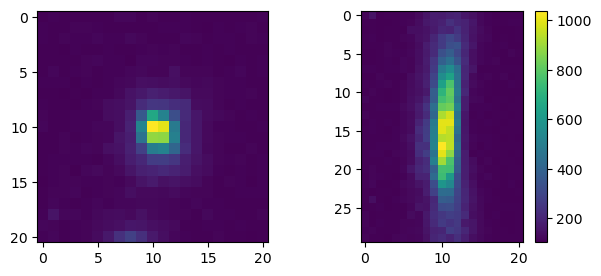

(30, 21, 21)
planes_10_z_55_y_307_x_1183 635.0


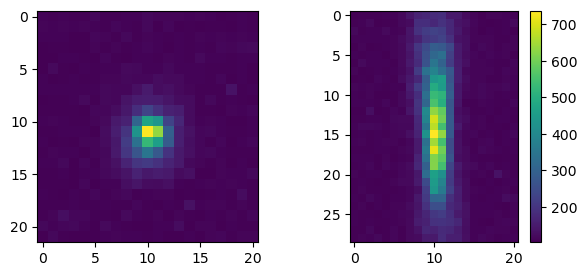

(29, 22, 21)
planes_10_z_55_y_207_x_190 359.0


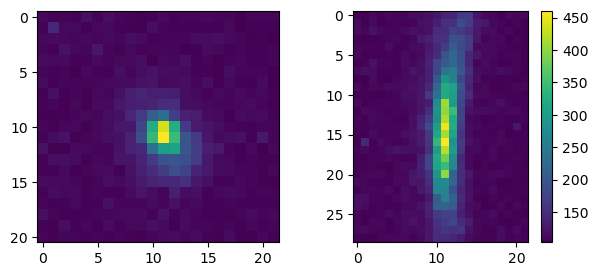

(29, 21, 22)
planes_10_z_51_y_627_x_113 356.0


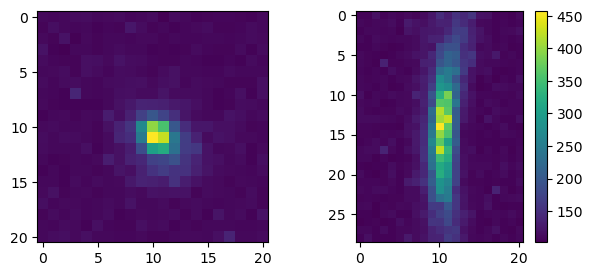

(29, 21, 21)
planes_10_z_53_y_334_x_21 566.0


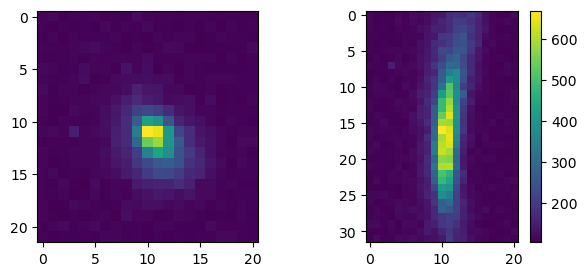

(32, 22, 21)
planes_10_z_56_y_127_x_142 573.0


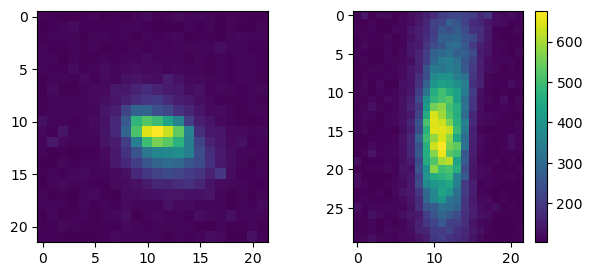

(30, 22, 22)
planes_10_z_55_y_100_x_1192 353.0


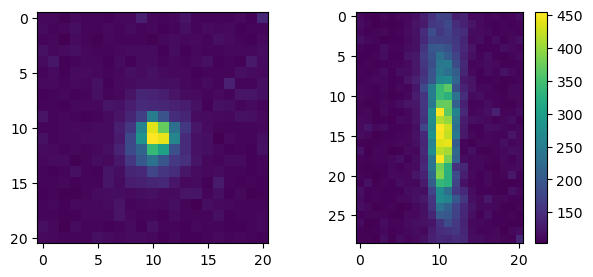

(29, 21, 21)
planes_10_z_54_y_81_x_580 437.0


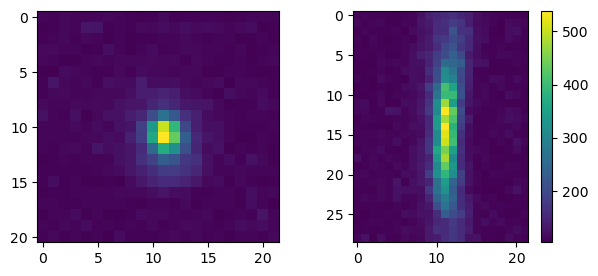

(29, 21, 22)
planes_10_z_52_y_874_x_554 479.0


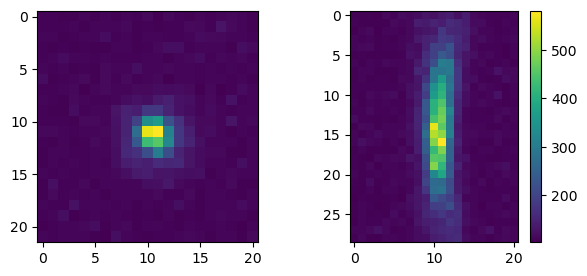

(29, 22, 21)
planes_10_z_51_y_729_x_362 426.0


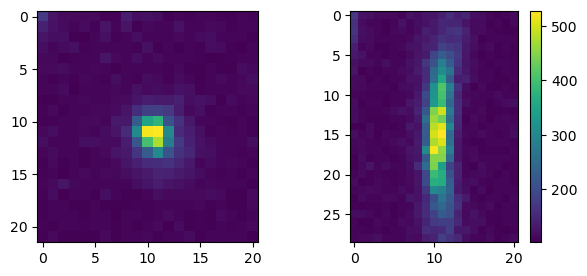

(29, 22, 21)
planes_10_z_57_y_91_x_798 482.0


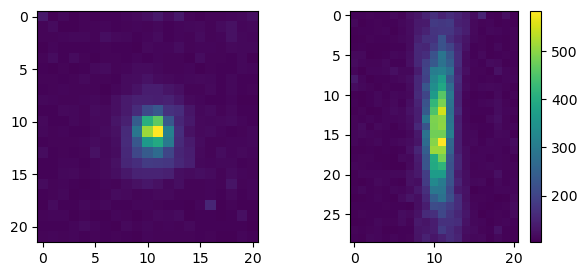

(29, 22, 21)
planes_10_z_56_y_111_x_485 474.0


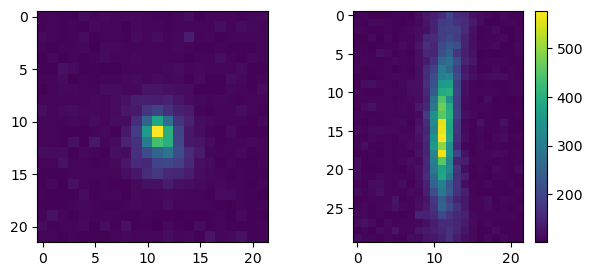

(30, 22, 22)
planes_10_z_50_y_1047_x_330 311.0


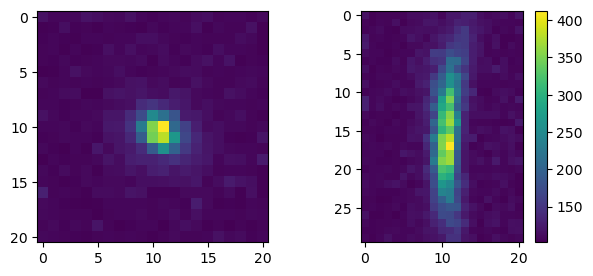

(30, 21, 21)
planes_10_z_51_y_930_x_69 232.0


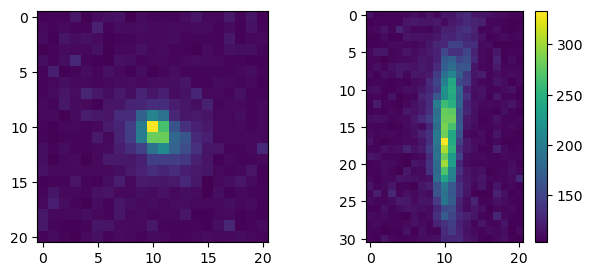

(31, 21, 21)
planes_10_z_54_y_75_x_1465 374.0


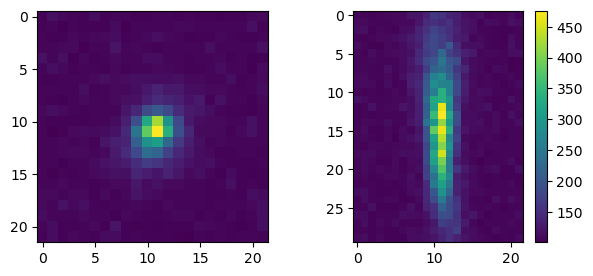

(30, 22, 22)
planes_10_z_56_y_80_x_92 305.0


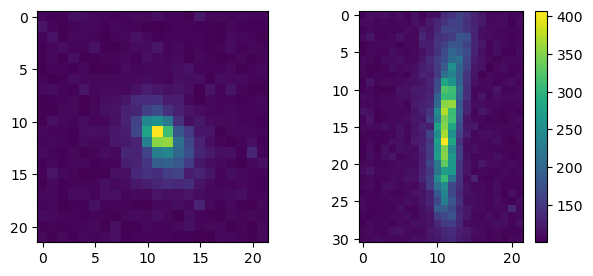

(31, 22, 22)
planes_10_z_52_y_595_x_1207 1213.0


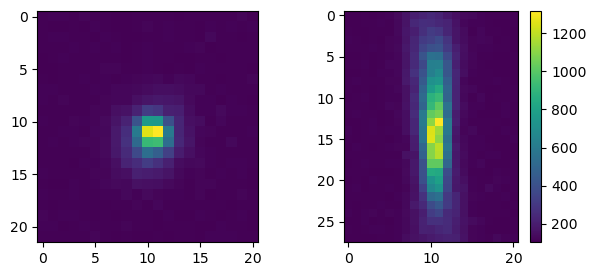

(28, 22, 21)
planes_10_z_57_y_144_x_818 958.0


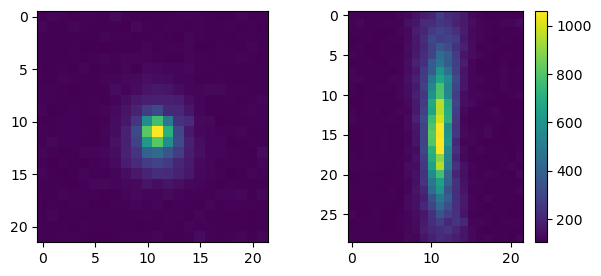

(29, 22, 22)
planes_10_z_53_y_49_x_319 387.0


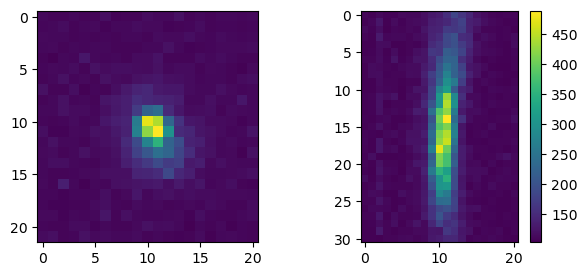

(31, 22, 21)
planes_10_z_51_y_496_x_838 478.0


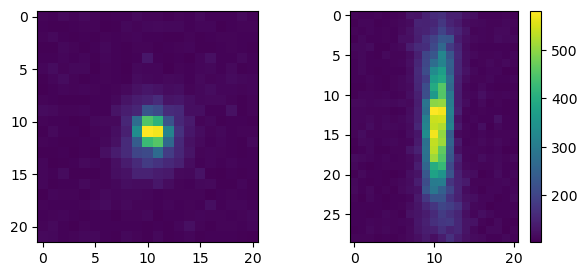

(29, 22, 21)
planes_10_z_53_y_810_x_1224 520.0


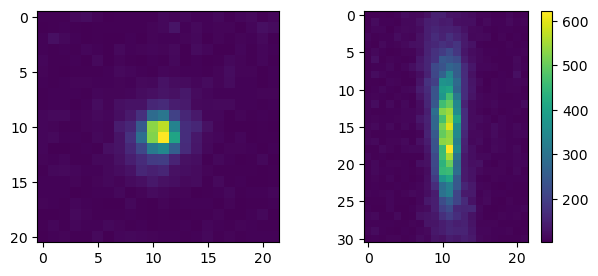

(31, 21, 22)
planes_10_z_49_y_635_x_475 800.0


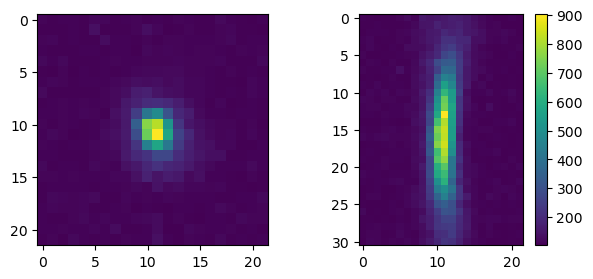

(31, 22, 22)
planes_10_z_51_y_839_x_954 438.0


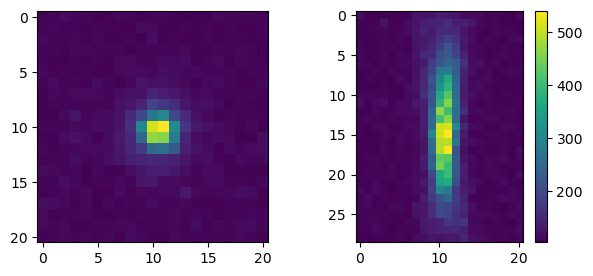

(29, 21, 21)
planes_10_z_52_y_765_x_758 449.0


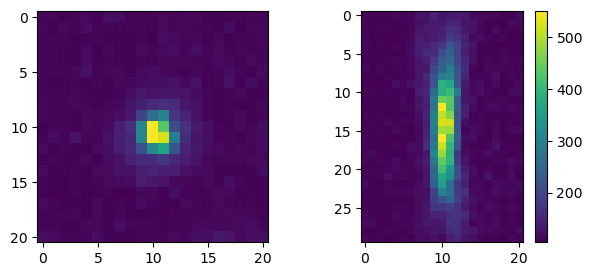

(30, 21, 21)
planes_10_z_55_y_382_x_398 399.0


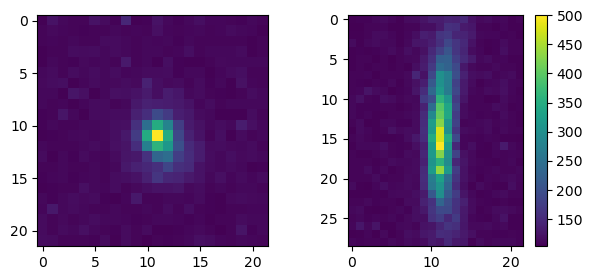

(29, 22, 22)
planes_10_z_57_y_249_x_742 2060.0


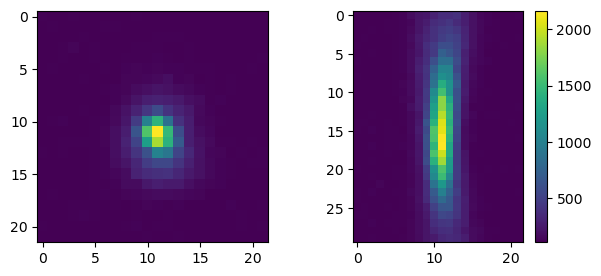

(30, 22, 22)
planes_10_z_50_y_609_x_198 328.0


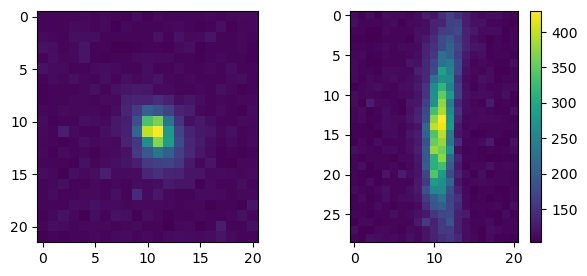

(29, 22, 21)
planes_10_z_48_y_548_x_44 120.0


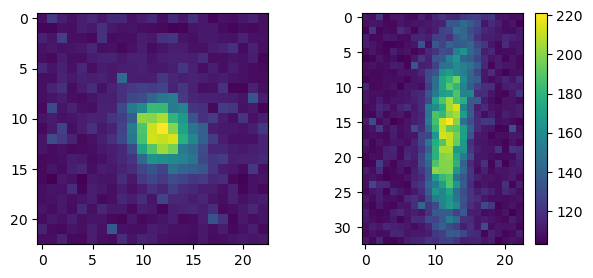

(33, 23, 23)
planes_10_z_52_y_452_x_781 1101.0


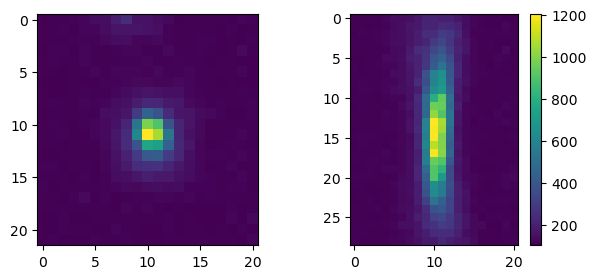

(29, 22, 21)
planes_10_z_51_y_595_x_693 462.0


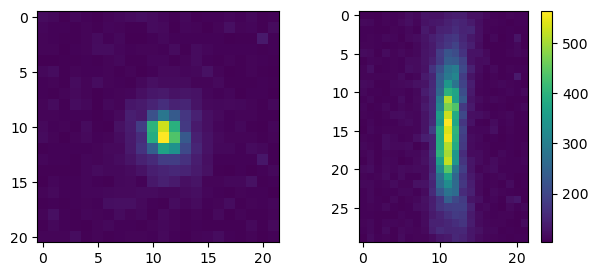

(30, 21, 22)
planes_10_z_56_y_332_x_895 773.0


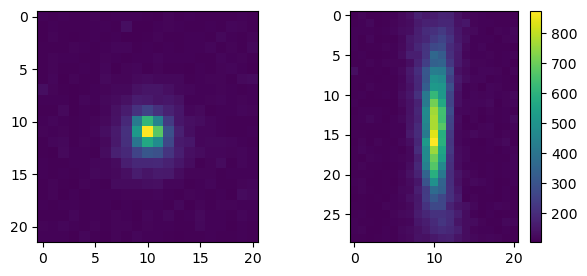

(29, 22, 21)
planes_10_z_58_y_64_x_1044 608.0


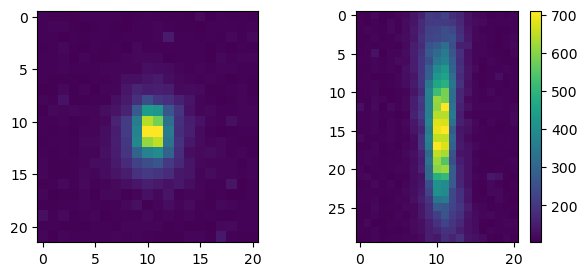

(30, 22, 21)
planes_10_z_51_y_807_x_138 354.0


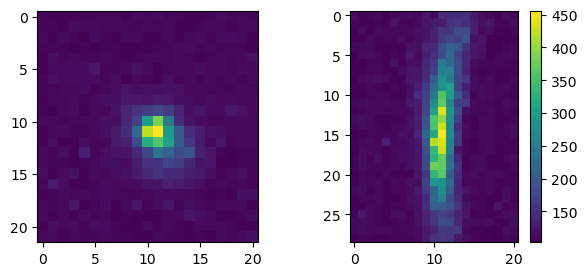

(29, 22, 21)


In [27]:
i=0
for n,pat in crops.items():
    zz,yy,xx = pat.shape
    x_arr = np.arange(-1*yy//2, yy//2)
    z_arr = np.arange(-1*zz//2, zz//2)
    fig, axs = plt.subplots(1,2,figsize=(7,3))
    print(n, np.max(pat) - np.median(pat))
    # print(shannon_entropy(pat))
    axs[0].imshow(np.max(pat,0))
    im = axs[1].imshow(np.max(pat,1))
    plt.colorbar(im)
    plt.show()
    print(pat.shape)
    i=i+1
    if i==50:
        break
None;

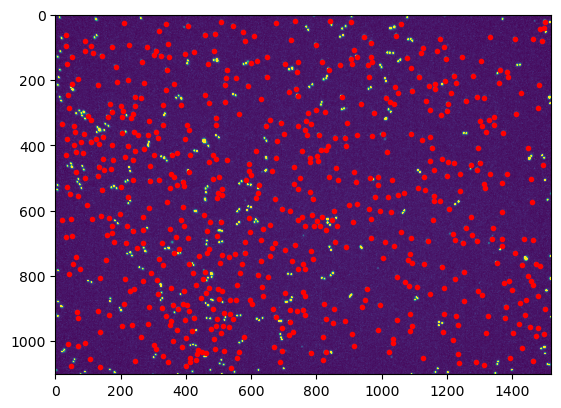

In [28]:
plt.imshow(img_max, clim=(np.percentile(img_max,3), np.percentile(img_max,99)))
plt.plot(pos[:,2], pos[:,1],'r.');

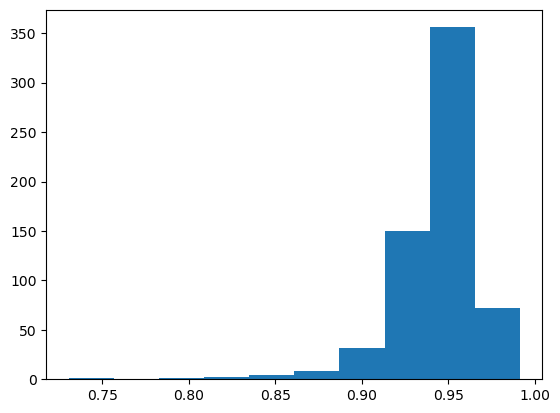

In [29]:
snr = []
for key,val in crops.items():
    val = min_max_norm(val)
    snr.append(np.max(val) - np.median(val))
snr = np.array(snr)
plt.hist(snr.flatten());

## Run Zola macro via bash command

Needs fiji for linux. Copy `Fiji.app` from Debayan's folder.


### Troubleshooting ###

**Test Deb's ImageJ macro**

In [31]:
# i = 29
# INPUT_DIR=f"{save_dir}/patches_for_zola/patches_{i}"
# print(INPUT_DIR)
# print(FIJI_MACRO_PATH)

In [32]:
# ! /home/jwhite/fiji/Fiji.app/ImageJ-linux64 --headless -batch /home/jwhite/projects/aberration_mapping/imageJ_macros/zola_macro_cluster_1p2_z_50.ijm '/home/jwhite/projects/aberration_mapping/data/andrea/0p5mkBeadsDICHmirror_4/patches_for_zola/patches_28/'

In [33]:
# ! sbatch /home/jwhite/projects/aberration_mapping/scripts/bashscript_fiji.sh /home/jwhite/projects/aberration_mapping/imageJ_macros/zola_macro_cluster_1p2_z_50.ijm  '/home/jwhite/projects/aberration_mapping/data/andrea/0p5mkBeadsDICHmirror_4/patches_for_zola/patches_28/' 

In [34]:
# !sbatch /home/jwhite/projects/aberration_mapping/scripts/bashscript_fiji.sh {FIJI_MACRO_PATH} {INPUT_DIR}

In [35]:
# be sure the std/ directory exists
# !sbatch  -J {i} -e std/{i}.err -o std/{i}.out /home/jwhite/projects/aberration_mapping/scripts/bashscript_fiji.sh {FIJI_MACRO_PATH} {INPUT_DIR}

### Run Zola analysis on cluster ###

In [41]:
# Deleting the zola_raw folder and creating a new one
shutil.rmtree(f"{save_dir}/patches_for_zola/zola_raw/", ignore_errors=True)
os.makedirs(  f"{save_dir}/patches_for_zola/zola_raw/")

INPUT_DIR=f"{save_dir}/patches_for_zola/patches_{i}"

In [48]:
# check what we are sending to command line
! echo {zola_script_path}
print()
! echo {FIJI_MACRO_PATH}
print()
! echo {INPUT_DIR} 

/home/jwhite/projects/aberration_mapping/scripts/bashscript_fiji.sh

/home/jwhite/projects/aberration_mapping/imageJ_macros/zola_macro_cluster_1p2_z_50_2ndfloor.ijm

/home/jwhite/projects/aberration_mapping/data/andrea/2022_09_06_Beads_0p2_2ndfloorscope/patches_for_zola/patches_0


In [36]:
# not sure why Debayan had jobs split into two groups
#
# ***** be sure the std/ directory exists *****
#
# running zola on all the patches
for i in range(35):
# for i in [28]:
# for i in range(1):
# for i in range(0,num_folders):
    FIJI_MACRO_PATH = fiji_macro_path
    INPUT_DIR=f"{save_dir}/patches_for_zola/patches_{i}"
    !sbatch -J {i} -e std/{i}.err -o std/{i}.out {zola_script_path} {FIJI_MACRO_PATH} {INPUT_DIR}
    # print()
#     break

for i in range(35, num_folders):
    INPUT_DIR=f"{save_dir}/patches_for_zola/patches_{i}"
    print(INPUT_DIR)
    print(zola_script_path)
    !sbatch -J {i} -e std/{i}.err -o std/{i}.out {zola_script_path} {FIJI_MACRO_PATH} {INPUT_DIR}
    print()

Submitted batch job 48905928


In [37]:
# monitor progress....
l = !squeue -u jwhite
l = l[2:]
n = len(l)
while n > 0:
    clear_output(wait=False)
    l = !squeue -u jwhite
    l = l[2:]
    n=len(l)
    display(f'{n} files to go')
    sleep(1)

'0 files to go'

## Write current parameters to `params.json`

In [38]:
# Write to params file
params = {
    'crop_shape':crop_shape, 
    'unit':unit, 
    'abb_list': abb_list, 
    'FIJI_MACRO_PATH': FIJI_MACRO_PATH, 
    'COMPUTERNAME' : socket.gethostname(),
    'thresh_bck':thresh_bck, 
    'lam':lam, 
    'thresh_dist':thresh_dist
}

write_to_param_file(img_path, params)

## Sample Fiji macro

```
/*
 * @Debayan MPI-CBG
 */

file_path = getArgument();
print("In macro");
print(file_path);
processFolder(file_path); 

// function to scan folders/subfolders/files to find files with correct suffix
function processFolder(input) {
	start = getTime();
	print(input)
	list = getFileList(input);
	list = Array.sort(list);
	print(list.length)
	for (i = 0; i < list.length; i++) {
		print(list[i]);
		if(File.isDirectory(input + File.separator + list[i])){
			l = substring(list[i], 0, lengthOf(list[i])-1);
			processFolder(input + File.separator + l + File.separator);
		}
		if(endsWith(list[i], ".tif")){
			processFile(input, list[i]);
		}
	}
	print("Totoal Time: "+(getTime()-start)/1000);   
}

function processFile(input, file) {
	print("Processing: "+ input + File.separator + file);
	if (indexOf(input, "patches") > 0) {
		if (!File.exists(File.getParent(input) + File.separator + "zola_raw")){
			File.makeDirectory(File.getParent(input) + File.separator + "zola_raw"); 
		}
	output = File.getParent(input) + File.separator + "zola_raw"+ File.separator + substring(file, 0, indexOf(file, '.tif'))+'.json';
	print(output);

	open(input + File.separator + file);
	setSlice((nSlices+1)/2); 
	makePoint(getWidth()/2, getHeight()/2);
	wid = 64;
	run(" Calibration: PSF modeling", "run_on_gpu gain=1 pixel_size=200 z_step=50 bead_moving=[far -> close to objective] numerical_aperture=1.2 immersion_refractive=1.33 wavelength=0.515 patch_size="+wid+" zernike_coefficient=[Zernike 15 coefs] iteration=20 result_calibration_file="+output);
	run("Close All");
	}
	else{print("No patches");
	}
}

```

## Sample Zola bash scripts ##



**`/projects/project-dsaha/insitu_psf/bashscript_fiji.sh`**

```
#!/bin/bash
#SBATCH -J "One"
#SBATCH -t 8:00:00
#SBATCH -n 1
#SBATCH -N 1
#SBATCH --partition=gpu
#SBATCH --gres=gpu:1
#SBATCH --mem 1000


#export OPENBLAS_NUM_THREADS=4

module unload cuda
module load cuda/10.0.130
#module load cuda/9.0.176

echo "Starting Fiji script"


FIJI_MACRO_FILEPATH=$1
PATCHES_FOLDER_PATH=$2
echo ${FIJI_MACRO_FILEPATH}
echo ${PATCHES_FOLDER_PATH}
echo "Bashscript"
/projects/project-dsaha/Fiji_jobs/Fiji.app/ImageJ-linux64 --headless -batch ${FIJI_MACRO_FILEPATH} ${PATCHES_FOLDER_PATH}

echo "Finishing Fiji script"

```

**`/home/jwhite/projects/aberration_mapping/scripts/bashscript_fiji.sh`**

```
#!/bin/bash
#SBATCH -J "One"
#SBATCH -t 8:00:00
#SBATCH -n 1
#SBATCH -N 1
#SBATCH --partition=gpu
#SBATCH --gres=gpu:1
#SBATCH --mem 1000


#export OPENBLAS_NUM_THREADS=4

module unload cuda
module load cuda/10.0.130
#module load cuda/9.0.176

echo "Starting Fiji script"


FIJI_MACRO_FILEPATH=$1
PATCHES_FOLDER_PATH=$2
echo ${FIJI_MACRO_FILEPATH}
echo ${PATCHES_FOLDER_PATH}
echo "Bashscript"
/home/jwhite/fiji/Fiji.app/ImageJ-linux64 --headless -batch ${FIJI_MACRO_FILEPATH} ${PATCHES_FOLDER_PATH}

echo "Finishing Fiji script"


```

**`/projects/project-dsaha/insitu_psf/bashscript_fiji_short.sh`**

```
#!/bin/bash
#SBATCH -J "One"
#SBATCH -t 1:00:00
#SBATCH -n 1
#SBATCH -N 1
#SBATCH --partition=short
#SBATCH --gres=gpu:1
#SBATCH --mem 5000


#export OPENBLAS_NUM_THREADS=4

module unload cuda
module load cuda/10.0.130
#module load cuda/9.0.176

echo "Starting Fiji script"


FIJI_MACRO_FILEPATH=$1
PATCHES_FOLDER_PATH=$2
echo ${FIJI_MACRO_FILEPATH}
echo ${PATCHES_FOLDER_PATH}
echo "Bashscript"
/projects/project-dsaha/Fiji_jobs/Fiji.app/ImageJ-linux64 --headless -batch ${FIJI_MACRO_FILEPATH} ${PATCHES_FOLDER_PATH}

echo "Finishing Fiji script"


```

# End #